This version of Notebook is the main notebook which contain multiple experiment and data exploration

In [1]:
import pandas as pd
import deepcut
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
from imblearn.over_sampling import SMOTE
import time

Using TensorFlow backend.


import the data and assign polarity

In [2]:
neg = pd.read_csv('./Data/neg.txt', header = None, sep = "\t", names = ["text"])
neg['polarity'] = 0

In [3]:
pos = pd.read_csv('./Data/pos.txt', header = None, sep = "\t", names = ["text"])
pos['polarity'] = 2

In [4]:
neu = pd.read_csv('./Data/neu.txt', header = None, sep = "\t", names = ["text"])
neu['polarity'] = 1

Combine the data

In [6]:

dfall = pd.concat([neg, neu, pos]) 

In [7]:
dfall.head()

,text,polarity
0,😔,0
1,😞,0
2,😥,0
3,รำ,0
4,Noๆ,0


Split the data

In [8]:
from sklearn.model_selection import train_test_split

traindf, testdf = train_test_split(dfall, test_size=0.15, random_state = 42)

In [9]:
df = traindf

In [10]:
df.head()

,text,polarity
8668,ถ้าหลายๆประเทศตีพิมแบบนี้รับรองไม่มีคนมาเที่ยว...,1
6531,มันเกินไปครับ เงิบก็เงิบไปแต่ตำรวจทำไมแก้ปัญหา...,0
1429,สธ ย่อมาจาก เสดสวะน่ะตัวเธอ,0
2609,ซีวิคไดแมนชั่น,1
11435,กระบะ โดย Gene มันน่าจะกระด้างอยู่แล้ว ไม่ว่าไ...,1


clean the data!

In [11]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
def cleaning(text):
    # clean the text by getting rid of any punctuation
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

Apply the cleaning

In [13]:
df['text'] = df['text'].apply(lambda x: cleaning(x))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Do the word segmentation using True's deep cut

In [14]:
testdf['text'] = testdf['text'].apply(lambda x: cleaning(x))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
def split_words (sentence):
    return deepcut.tokenize(''.join(sentence.lower().split()))

Apply the cutting to training set

In [16]:
df['text'] = df['text'].apply(lambda x: split_words(x))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Apply the cutting to testing set

In [17]:
start = time.time()
testdf['text'] = testdf['text'].apply(lambda x: split_words(x))
end = time.time()
print(end - start)

33.31102466583252


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Check the data a bit

In [18]:
df.head(20)

,text,polarity
8668,"[ถ้า, หลาย, ๆ, ประเทศตีพิม, แบบ, นี้, รับรอง, ...",1
6531,"[มัน, เกิน, ไป, ครับ, เงิบ, ก็, เงิบ, ไป, แต่,...",0
1429,"[สธ, ย่อ, มา, จาก, เสดสวะ, น่ะ, ตัว, เธอ]",0
2609,[ซีวิคไดแมนชั่น],1
11435,"[กระบะ, โดย, gene, มัน, น่า, จะ, กระด้าง, อยู่...",1
3502,"[อะไร, คือ, เหมือน, รี, อะไร, คือ, เหมือน, เรด...",0
4914,"[บุหรี่, มวย, ขาย, ไม่, ออก, ครับ]",1
9318,"[มา, ติดตาม, เพจ, กัน, ค่ะ, รัก, แอด, มิน, ที่...",1
1411,"[ต้อง, ลอง, แล้ว, แหละ]",2
6237,"[พรบ, คู่, ชีวิต, คือ, จุดจบ, ของ, การ, ฉาบ, ห...",0


Clone the data frame a bit to do data exploration on

In [19]:
statdf = df.copy()

In [20]:
statdf['wordcount'] = statdf['text'].apply(len)
print (statdf)

                                                    text  polarity  wordcount
8668   [ถ้า, หลาย, ๆ, ประเทศตีพิม, แบบ, นี้, รับรอง, ...         1         14
6531   [มัน, เกิน, ไป, ครับ, เงิบ, ก็, เงิบ, ไป, แต่,...         0         96
1429           [สธ, ย่อ, มา, จาก, เสดสวะ, น่ะ, ตัว, เธอ]         0          8
2609                                    [ซีวิคไดแมนชั่น]         1          1
11435  [กระบะ, โดย, gene, มัน, น่า, จะ, กระด้าง, อยู่...         1         24
...                                                  ...       ...        ...
14932  [เมื่อ, เกิด, บาดแผล, ควร, ทำ, ยัง, ไง, คำ, ถา...         1         57
5390   [คุณภาพ, ต้อง, ยก, ให้, โตโยต้า, แหละ, ครับ, ท...         0         32
860             [ของ, เรา, มี, ไม่, กี่, น้ำ, จิ้ม, เอง]         0          8
9152   [ไม่, โดน, หัก, เงิน, ค่ะ, ใน, ตรง, ส่วน, นี้,...         1         16
1027                                  [ช่วย, ๆ, กันแชร์]         2          3

[23378 rows x 3 columns]


In [21]:
statdf.head()

,text,polarity,wordcount
8668,"[ถ้า, หลาย, ๆ, ประเทศตีพิม, แบบ, นี้, รับรอง, ...",1,14
6531,"[มัน, เกิน, ไป, ครับ, เงิบ, ก็, เงิบ, ไป, แต่,...",0,96
1429,"[สธ, ย่อ, มา, จาก, เสดสวะ, น่ะ, ตัว, เธอ]",0,8
2609,[ซีวิคไดแมนชั่น],1,1
11435,"[กระบะ, โดย, gene, มัน, น่า, จะ, กระด้าง, อยู่...",1,24


Do some more EDA

In [22]:
print(statdf['wordcount'].max())
print(statdf['wordcount'].mean())

495
20.0300282316708


In [23]:
statdf['wordcount'].describe()

count    23378.000000
mean        20.030028
std         30.573988
min          1.000000
25%          5.000000
50%         10.000000
75%         23.000000
max        495.000000
Name: wordcount, dtype: float64

In [24]:
def get_words_in_sentences(sentences):
    #This function return all words in the dataframe
    all_words = []
    for (words) in sentences:
        all_words.extend(words)
    return all_words

In [25]:
from nltk.probability import FreqDist
def get_word_features(wordlist):
    #This function return ordered list based on descending frequency 
    wordlist = FreqDist(wordlist)
    wordlist.plot(10)
    word_features = [word[0] for word in wordlist.most_common()]
    return word_features

Create a list of all the word

In [26]:
all_words=get_words_in_sentences(statdf['text'])

Create a frequency word list in decending order

D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3656 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3607 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3637 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matp

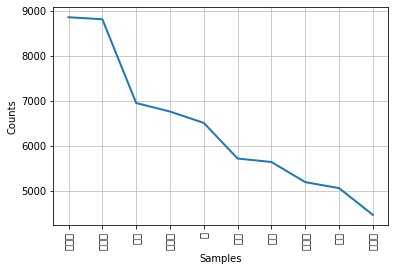

In [27]:
freq_list = get_word_features(all_words)

In [28]:
len(freq_list)

36321

In [29]:
freq_list

['ไม่',
 'ที่',
 'ไป',
 'ได้',
 'ๆ',
 'มี',
 'มา',
 'นี้',
 'จะ',
 'ให้',
 'ก็',
 'เลย',
 'แล้ว',
 'เป็น',
 'ใน',
 'กัน',
 'และ',
 'ของ',
 'ว่า',
 'กับ',
 'นะ',
 'ครับ',
 'กิน',
 'ค่ะ',
 'วัน',
 'คน',
 'การ',
 'แต่',
 'ดี',
 'ต้อง',
 'มาก',
 'ใช้',
 'ด้วย',
 'อยาก',
 'ความ',
 'มัน',
 'เรา',
 'ตัว',
 'รถ',
 'ทำ',
 'จาก',
 'งาน',
 'ยัง',
 'ทุก',
 'แบบ',
 'คือ',
 'กว่า',
 'อีก',
 'อยู่',
 'เบียร์',
 'เพราะ',
 'หน้า',
 'ถ้า',
 'คะ',
 'ผม',
 'ถึง',
 'ปี',
 'เพื่อน',
 'อย่าง',
 'หรือ',
 'ซื้อ',
 'เอา',
 'นี่',
 'ใหม่',
 'ดู',
 'ขอ',
 'เข้า',
 'ช้าง',
 'ขึ้น',
 'ออก',
 'น้ำ',
 'รับ',
 'จริง',
 'ราคา',
 'นั้น',
 'ผู้',
 'ก่อน',
 'บอก',
 'ตอน',
 'เหมือน',
 'ไหน',
 'เท่า',
 'น่า',
 'ละ',
 'บาท',
 'อะไร',
 'ทั้ง',
 'พร้อม',
 'แค่',
 'ขาย',
 'ทาง',
 'สุด',
 'คุณ',
 'เพื่อ',
 'สี',
 'เอง',
 'ส่วน',
 'ผิว',
 'จัด',
 'ต่อ',
 'รู้',
 'เห็น',
 'สาขา',
 'บัตร',
 'ชอบ',
 'เรื่อง',
 'เวลา',
 'ใคร',
 'ลด',
 'ร่วม',
 'เคย',
 'ไทย',
 'ช่วย',
 '️',
 'หมด',
 'เดียว',
 'ใช่',
 'ลง',
 'คิด',
 'เปิด',
 'สวย',
 'ร

We can see the word ไม่ ที่ ไป appear the most on the list

Now to the vectorization phased first I try tokenized the data but word embedding outperform it significantly.

For vectorization, First we build word embedding model

First we put text in numpy list form for data handling in the future

In [30]:
clean_train_texts = []
for text in df['text']:
    clean_train_texts.append(text)

In [31]:
clean_test_texts = []
for text in testdf['text']:
    clean_test_texts.append(text)

In [32]:
clean_train_texts

[['ถ้า',
  'หลาย',
  'ๆ',
  'ประเทศตีพิม',
  'แบบ',
  'นี้',
  'รับรอง',
  'ไม่',
  'มี',
  'คน',
  'มา',
  'เที่ยว',
  'แน่',
  'ๆ'],
 ['มัน',
  'เกิน',
  'ไป',
  'ครับ',
  'เงิบ',
  'ก็',
  'เงิบ',
  'ไป',
  'แต่',
  'ตำรวจ',
  'ทำไม',
  'แก้',
  'ปัญหา',
  'ที่',
  'ปลาย',
  'เหตุ',
  'คน',
  'ขาย',
  'บุหรี่',
  'ไฟฟ้า',
  'เต็ม',
  'พัทยา',
  'คือ',
  'ถ้า',
  'ไม่',
  'จ่าย',
  'เงิน',
  'พวก',
  'มัน',
  'ก็',
  'คง',
  'ขาย',
  'ไม่',
  'ได้',
  'ได้',
  'เงิน',
  'ส่วย',
  'ไม่',
  'พอ',
  'มา',
  'เที่ยว',
  'จับ',
  'หา',
  'ค่า',
  'เหล้า',
  'อีก',
  'เข้าใจ',
  'ครับ',
  'ว่า',
  'ช่วง',
  'นี้',
  'หากิน',
  'กับ',
  'ประชาชน',
  'ลำบาก',
  'ทาง',
  'ไหน',
  'ได้',
  'เขา',
  'ก็',
  'ต้อง',
  'เอา',
  'ตำรวจ',
  'ทุก',
  'คน',
  'กล้า',
  'พูด',
  'ได้',
  'เต็มปาก',
  'รึ',
  'ป่าว',
  'ว่า',
  'ไม่',
  'มี',
  'คน',
  'ใน',
  'องกรค์',
  'เอา',
  'บุหรี่',
  'ไฟฟ้า',
  'ที่',
  'จับ',
  'ได้',
  'ออก',
  'มา',
  'โพส',
  'ขาย',
  'ต่อ',
  'ถุย',
  'ยยย',
  'เกือบ',
  

Built self train word2Vec skipgram model

In [33]:
# Creating the model and setting values for the various parameters
import multiprocessing
cores = multiprocessing.cpu_count()
num_features = 300  # Word vector dimensionality
min_word_count = 10 # Minimum word count
num_workers = cores     # Number of parallel threads
context = 10        # Context window size
downsampling = 1e-3 # (0.001) Downsample setting for frequent words

# Initializing the train model
from gensim.models import word2vec
print("Training model....")
model = word2vec.Word2Vec(clean_train_texts,\
                          sg=1,\
                          workers=num_workers,\
                          size=num_features,\
                          min_count=min_word_count,\
                          window=context,
                          sample=downsampling)

# To make the model memory efficient
model.init_sims(replace=True)

# Saving the model for later use. Can be loaded using Word2Vec.load()
model_name = "300features_10minwords_10context"
model.save(model_name)

D:\Anaconda\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Training model....


D:\Anaconda\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Test the word embedding model a little bit

In [34]:
model.wv.most_similar("ตัง")

[('ตังค์', 0.8493871092796326),
 ('แระ', 0.8013781905174255),
 ('แปป', 0.7971383929252625),
 ('ปะ', 0.7916860580444336),
 ('บ่', 0.7867201566696167),
 ('เสียดาย', 0.7797818779945374),
 ('ออออ', 0.7782315611839294),
 ('แมค', 0.7708637714385986),
 ('เด่ว', 0.7686813473701477),
 ('ไม๊', 0.7672627568244934)]

In [35]:
model.wv.most_similar("ชอบ")

[('ถูกใจ', 0.688575029373169),
 ('นิ่ม', 0.6654776930809021),
 ('ต้า', 0.6561217904090881),
 ('ละมุน', 0.6353483200073242),
 ('spy', 0.6310198903083801),
 ('ถนัด', 0.6277161836624146),
 ('กกกก', 0.624364972114563),
 ('อ', 0.6233199834823608),
 ('มากก', 0.6187648177146912),
 ('ลื่น', 0.6163122057914734)]

In [36]:
model.wv.syn0.shape

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


(3102, 300)

Turn the text into matrix form using word embedding model

In [37]:
#This function put each word in a sentence into vector form
def featureVecMethod(words, model, num_features):
    # Pre-initialising empty numpy array for speed
    featureVec = np.zeros(num_features,dtype="float32")
    nwords = 0
    
    #Converting Index2Word which is a list to a set for better speed in the execution.
    index2word_set = set(model.wv.index2word)
    
    for word in  words:
        if word in index2word_set:
            nwords = nwords + 1
            featureVec = np.add(featureVec,model[word])
            if np.isnan(featureVec).sum()!= 0:
                print(word)
    
    # Dividing the result by number of words to get average
    if nwords != 0:
        featureVec = np.divide(featureVec, nwords)
    
    return featureVec

In [38]:
#This function pass each sentence into featureVecMethod to turn each sentence into matrix form
def getAvgFeatureVecs(texts, model, num_features):
    counter = 0
    textFeatureVecs = np.zeros((len(texts),num_features),dtype="float32")
    for text in texts:
        # Printing a status message every 1000th text
        if counter%1000 == 0:
            print("text %d of %d"%(counter,len(texts)))
            
        textFeatureVecs[counter] = featureVecMethod(text, model, num_features)
        counter = counter+1
        
    return textFeatureVecs

parse the training set into vector form

In [39]:
trainDataVecs = getAvgFeatureVecs(clean_train_texts, model, num_features)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


text 0 of 23378
text 1000 of 23378
text 2000 of 23378
text 3000 of 23378
text 4000 of 23378
text 5000 of 23378
text 6000 of 23378
text 7000 of 23378
text 8000 of 23378
text 9000 of 23378
text 10000 of 23378
text 11000 of 23378
text 12000 of 23378
text 13000 of 23378
text 14000 of 23378
text 15000 of 23378
text 16000 of 23378
text 17000 of 23378
text 18000 of 23378
text 19000 of 23378
text 20000 of 23378
text 21000 of 23378
text 22000 of 23378
text 23000 of 23378


parse the test set into vector form

In [40]:
start = time.time()
testDataVecs = getAvgFeatureVecs(clean_test_texts, model, num_features)
end = time.time()
print(end - start)

text 0 of 4126


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


text 1000 of 4126
text 2000 of 4126
text 3000 of 4126
text 4000 of 4126
1.1636199951171875


Try using Random forest model

In [41]:
trainDataVecs.shape

(23378, 300)

In [42]:
# Fitting a random forest classifier to the training data
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100)
    
print("Fitting random forest to training data....")    
forest = forest.fit(trainDataVecs, df["polarity"])

Fitting random forest to training data....


Built a XGBoost Model

In [43]:
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.externals import joblib

clf = OneVsRestClassifier(XGBClassifier(n_jobs=-1, max_depth=5,n_estimators=200)
    )


clf.fit(trainDataVecs, df["polarity"])
#Save the model
filename = 'XGBoost_finalized_model.sav'
joblib.dump(clf, filename)

D:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['XGBoost_finalized_model.sav']

Use the model to predict the outcome

In [44]:
loaded_model = joblib.load(filename)
# Predicting the sentiment values for test data and saving the results in a csv file 
result = forest.predict(testDataVecs)
start = time.time()
y_prob = loaded_model.predict(testDataVecs)
end = time.time()
print(end - start)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(testdf['polarity'], result))
print("Accuracy:",metrics.accuracy_score(testdf['polarity'], y_prob))


0.04185152053833008
Accuracy: 0.685651963160446
Accuracy: 0.7064953950557441


XGBoost outperform random forest.

Plot the result into confusion matrix and calculate precision, recall, f-1 score of Random forest

In [45]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
results1 = confusion_matrix(testdf['polarity'], result)
print ('Confusion Matrix :')
print (results1) 
print ('Accuracy Score :') 
print (accuracy_score(testdf['polarity'], result))
print ('Report : ')
print (classification_report(testdf['polarity'], result) )

Confusion Matrix :
[[ 547  425   10]
 [ 190 2128   85]
 [  66  521  154]]
Accuracy Score :
0.685651963160446
Report : 
              precision    recall  f1-score   support

           0       0.68      0.56      0.61       982
           1       0.69      0.89      0.78      2403
           2       0.62      0.21      0.31       741

    accuracy                           0.69      4126
   macro avg       0.66      0.55      0.57      4126
weighted avg       0.68      0.69      0.65      4126



Plot the result into confusion matrix and calculate precision, recall, f-1 score of XGBoost

In [46]:
results2 = confusion_matrix(testdf['polarity'], y_prob)
print ('Confusion Matrix :')
print (results2) 
print ('Accuracy Score :') 
print (accuracy_score(testdf['polarity'], y_prob))
print ('Report : ')
print (classification_report(testdf['polarity'], y_prob) )

Confusion Matrix :
[[ 660  298   24]
 [ 237 2029  137]
 [  79  436  226]]
Accuracy Score :
0.7064953950557441
Report : 
              precision    recall  f1-score   support

           0       0.68      0.67      0.67       982
           1       0.73      0.84      0.79      2403
           2       0.58      0.30      0.40       741

    accuracy                           0.71      4126
   macro avg       0.66      0.61      0.62      4126
weighted avg       0.69      0.71      0.69      4126



We can visualize it better

In [47]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix of Random Forest

Confusion matrix, without normalization
[[ 547  425   10]
 [ 190 2128   85]
 [  66  521  154]]


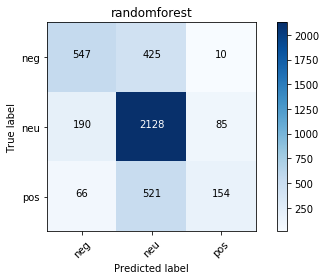

In [48]:
plt.figure()
plot_confusion_matrix(results1, classes=['neg', 'neu', 'pos'], title='randomforest')

Confusion matrix of XGBoost

Confusion matrix, without normalization
[[ 660  298   24]
 [ 237 2029  137]
 [  79  436  226]]


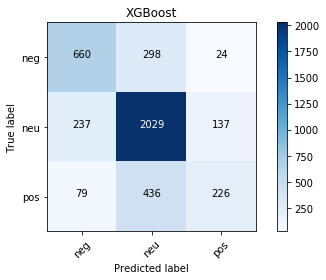

In [49]:
plt.figure()
plot_confusion_matrix(results2, classes=['neg', 'neu', 'pos'], title='XGBoost')

Machine Learning seem to have some trouble differentiate neutral and positive sentiment 

Let's try some Deep Learning

Before we can use deep learning model, we need to prepare some data first

Encode the polarity into usable form

In [50]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(df['polarity'])
encoded_Y = encoder.transform(df['polarity'])
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

Do the same for test set

In [51]:
encoder.fit(testdf['polarity'])
encoded_Y = encoder.transform(testdf['polarity'])
# convert integers to dummy variables (i.e. one hot encoded)
test_dummy_y = np_utils.to_categorical(encoded_Y)

In [52]:
df['polarity']

8668     1
6531     0
1429     0
2609     1
11435    1
        ..
14932    1
5390     0
860      0
9152     1
1027     2
Name: polarity, Length: 23378, dtype: int64

In [53]:
dummy_y

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [54]:
test_dummy_y

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

Split the data into train and validation set

In [55]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(df['text'], dummy_y, test_size=0.2, random_state=42)

Tokenized the word

In [56]:
X_train

15910    [ไม่, ได้, หรู, อย่าง, เดียว, ลุย, ก็, ได้, ho...
10517    [มี, บัตร, เข้า, ชม, มอเตอร์, โชว์, ที่, อิมแพ...
7047          [ขับ, ยาริส, ตัวเจยัง, เบ่ง, ได้, ขนาด, นี้]
3504                                [พรุ่ง, นี้, เลย, หรอ]
10415    [สนใจ, ค่ะ, โคโรลาโด, ประตู, ltมี, ข้อ, เสนอ, ...
                               ...                        
2789                                  [อยาก, รู้, ต้องลอง]
4719                   [เรา, น่า, จะ, โดน, กัน, หน่อย, นะ]
2256                                      [mamonde, กะสวย]
8490     [อ้าว, แล้ว, วัน, นั้น, ผม, ไป, ทำไม, จ่าย, ละ...
402                               [มี, ภาพ, ปลากรอบ, มั้ย]
Name: text, Length: 18702, dtype: object

In [57]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)

In [58]:
length = []
for x in X_train:
    length.append(len(x))
max(length)

489

In [59]:
from scipy import stats
stats.describe(length)

DescribeResult(nobs=18702, minmax=(1, 489), mean=20.077157523259544, variance=929.2518935722121, skewness=5.190776273913246, kurtosis=44.02074895904772)

Tokenized the trainning data

In [60]:
x_train_seq = pad_sequences(sequences, maxlen=num_features)
x_train_seq[:5]

array([[   0,    0,    0, ..., 2070,   99,  927],
       [   0,    0,    0, ...,   15,   39,   25],
       [   0,    0,    0, ...,    4,  211,    8],
       [   0,    0,    0, ...,    8,   13,  329],
       [   0,    0,    0, ..., 2707, 2707,   25]])

Tokenized the validation data

In [61]:
sequences_val = tokenizer.texts_to_sequences(X_validation)
x_val_seq = pad_sequences(sequences_val, maxlen=num_features)

Tokenized the test data

In [62]:
sequences_test = tokenizer.texts_to_sequences(testdf['text'])
x_test_seq = pad_sequences(sequences_test, maxlen=num_features)

Load the Word Embedding Model

In [63]:
from gensim.models import KeyedVectors
model_sg = KeyedVectors.load('300features_3minwords_10context')

D:\Anaconda\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [64]:
embeddings_index = {}
for w in model_sg.wv.vocab.keys():
    embeddings_index[w] = model_sg.wv[w]

In [65]:
num_words = 100000
embedding_matrix = np.zeros((num_words, num_features))
for word, i in tokenizer.word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
          embedding_matrix[i] = embedding_vector

Sanity Check

In [66]:
np.array_equal(embedding_matrix[1] ,embeddings_index.get('ไม่'))

True

Build the model using keras functional API

We use weight from word embedding model to transform tokenized word into weighted word

The first model is CNN using bigram and trigram then feed it into 2 dense layer

In [67]:
from keras.layers.embeddings import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D, Bidirectional
from keras.layers import LSTM
from keras.layers import Input, Dense, concatenate, Activation, CuDNNLSTM, Dropout
from keras.models import Model
from keras.layers import Flatten

text_input = Input(shape=(num_features,), dtype='int32')
text_encoder = Embedding(100000, num_features, input_length=num_features, weights=[embedding_matrix],  trainable=True)(text_input)
bigram_branch = Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1)(text_encoder)
bigram_branch = GlobalMaxPooling1D()(bigram_branch)
trigram_branch = Conv1D(filters=100, kernel_size=3, padding='valid', activation='relu', strides=1)(text_encoder)
trigram_branch = GlobalMaxPooling1D()(trigram_branch)
merged = concatenate([bigram_branch, trigram_branch], axis=1)
merged = Dense(256, activation='relu')(merged)
merged = Dropout(0.5)(merged)
merged = Dense(256, activation='relu')(merged)
merged = Dropout(0.5)(merged)
merged = Dense(3)(merged)
output = Activation('softmax')(merged)
CNNmodel = Model(inputs=[text_input], outputs=[output])
CNNmodel.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
CNNmodel.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 300)          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 300, 300)     30000000    input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_13 (Conv1D)              (None, 299, 100)     60100       embedding_3[0][0]                
__________________________________________________________________________________________________
conv1d_14 (Conv1D)              (None, 298, 100)     90100       embedding_3[0][0]                
__________________________________________________________________________________________________
global_max

Train the model and save the model with the best weight

In [68]:
from keras.callbacks import ModelCheckpoint
filepath="CNN_best_weights.{epoch:02d}-{val_acc:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = CNNmodel.fit(x_train_seq, y_train, validation_data=(x_val_seq, y_validation),
          callbacks = [checkpoint],batch_size=64, epochs=5)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 18702 samples, validate on 4676 samples
Epoch 1/5
18702/18702 [==============================] - 16s 845us/step - loss: 0.7648 - acc: 0.6753 - val_loss: 0.6560 - val_acc: 0.7186

Epoch 00001: val_acc improved from -inf to 0.71856, saving model to CNN_best_weights.01-0.7186.hdf5
Epoch 2/5
18702/18702 [==============================] - 14s 743us/step - loss: 0.4955 - acc: 0.8002 - val_loss: 0.6977 - val_acc: 0.7220

Epoch 00002: val_acc improved from 0.71856 to 0.72198, saving model to CNN_best_weights.02-0.7220.hdf5
Epoch 3/5
18702/18702 [==============================] - 14s 743us/step - loss: 0.2268 - acc: 0.9112 - val_loss: 0.8065 - val_acc: 0.7141

Epoch 00003: val_acc did not improve from 0.72198
Epoch 4/5
18702/18702 [==============================] - 14s 744us/step - loss: 0.1297 - acc: 0.9478 - val_loss: 0.9531 - val_acc: 0.7104

Epoch 00004: val

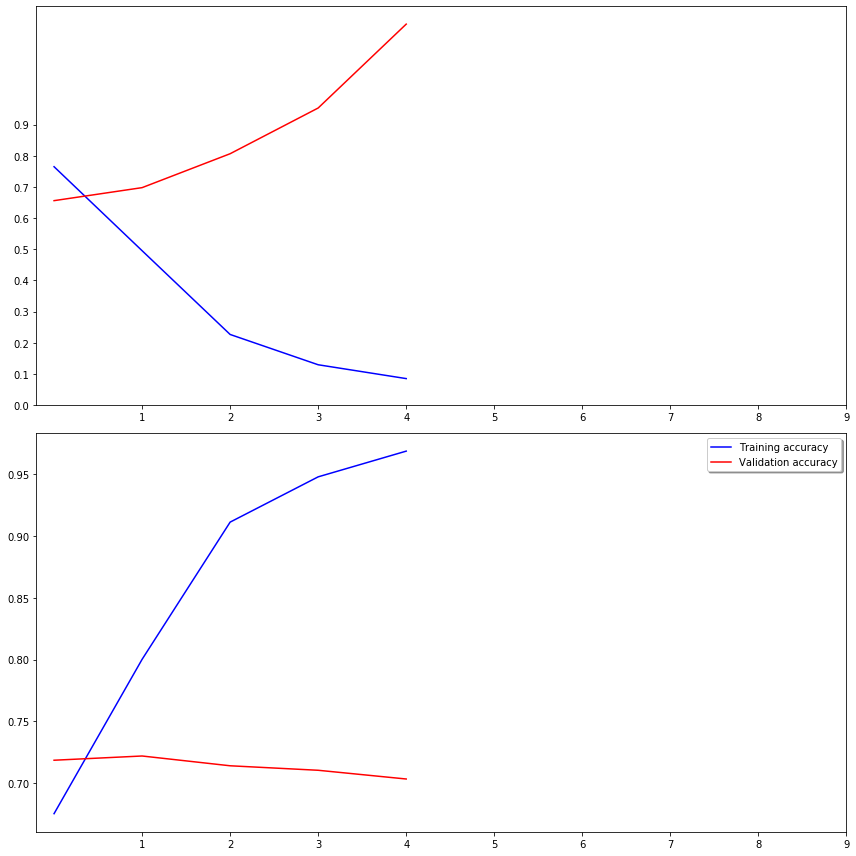

In [69]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 10, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 10, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()
from keras import backend as K 
K.clear_session()

Load the model we save and predict the test set then, transform the result from 3 value into 1 category

In [70]:
from keras.models import load_model
loaded_CNN_model = load_model('CNN_best_weights.02-0.7331.hdf5')
start = time.time()
y_pred = loaded_CNN_model.predict(x_test_seq)
Y_pred = np.argmax(y_pred, axis=1)
end = time.time()

Print the time it take for model to predict the result

In [71]:
print(end - start)

0.39983439445495605


Visualized the result

In [72]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
results5 = confusion_matrix(testdf['polarity'], Y_pred)
print ('Confusion Matrix :')
print (results5) 
print ('Accuracy Score :') 
print (accuracy_score(testdf['polarity'], Y_pred))
print ('Report : ')
print (classification_report(testdf['polarity'], Y_pred) )

Confusion Matrix :
[[ 635  312   35]
 [ 183 2067  153]
 [  62  401  278]]
Accuracy Score :
0.722249151720795
Report : 
              precision    recall  f1-score   support

           0       0.72      0.65      0.68       982
           1       0.74      0.86      0.80      2403
           2       0.60      0.38      0.46       741

    accuracy                           0.72      4126
   macro avg       0.69      0.63      0.65      4126
weighted avg       0.71      0.72      0.71      4126



Confusion matrix, without normalization
[[ 635  312   35]
 [ 183 2067  153]
 [  62  401  278]]


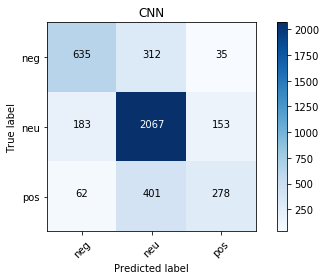

In [73]:
plt.figure()
plot_confusion_matrix(results5, classes=['neg', 'neu', 'pos'], title='CNN')

The model perform quite well outperform the traditional ml model.

This model is LSTM feed into the previous CNN model

In [74]:
from keras.layers import Conv1D, GlobalMaxPooling1D, Bidirectional
from keras.layers import LSTM
from keras.layers import Input, Dense, concatenate, Activation, CuDNNLSTM
from keras.models import Model
from keras.layers import Flatten
text_input = Input(shape=(num_features,), dtype='int32')
text_encoder = Embedding(100000, num_features, input_length=num_features, weights=[embedding_matrix],  trainable=True)(text_input)
lstm1 = Bidirectional(CuDNNLSTM(num_features,return_sequences = True))(text_encoder)
lstm1 = Dropout(0.3)(lstm1)
bigram_branch = Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1)(lstm1)
bigram_branch = GlobalMaxPooling1D()(bigram_branch)
trigram_branch = Conv1D(filters=100, kernel_size=3, padding='valid', activation='relu', strides=1)(lstm1)
trigram_branch = GlobalMaxPooling1D()(trigram_branch)
merged = concatenate([bigram_branch, trigram_branch], axis=1)
merged = Dense(256, activation='relu')(merged)
merged = Dense(256, activation='relu')(merged)
merged = Dropout(0.3)(merged)
merged = Dense(3)(merged)
output = Activation('softmax')(merged)
LSTMCNNmodel = Model(inputs=[text_input], outputs=[output])
LSTMCNNmodel.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
LSTMCNNmodel.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 300)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 300, 300)     30000000    input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 300, 600)     1444800     embedding_1[0][0]                
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 300, 600)     0           bidirectional_1[0][0]            
__________________________________________________________________________________________________
conv1d_1 (

In [75]:
from keras.callbacks import ModelCheckpoint
filepath="LSTMCNN_best_weights.{epoch:02d}-{val_acc:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = LSTMCNNmodel.fit(x_train_seq, y_train, validation_data=(x_val_seq, y_validation),
          callbacks = [checkpoint],batch_size=64, epochs=5)

Train on 18702 samples, validate on 4676 samples
Epoch 1/5
18702/18702 [==============================] - 52s 3ms/step - loss: 0.7454 - acc: 0.6824 - val_loss: 0.6857 - val_acc: 0.6995

Epoch 00001: val_acc improved from -inf to 0.69953, saving model to LSTMCNN_best_weights.01-0.6995.hdf5
Epoch 2/5
18702/18702 [==============================] - 50s 3ms/step - loss: 0.5310 - acc: 0.7851 - val_loss: 0.6659 - val_acc: 0.7239

Epoch 00002: val_acc improved from 0.69953 to 0.72391, saving model to LSTMCNN_best_weights.02-0.7239.hdf5
Epoch 3/5
18702/18702 [==============================] - 50s 3ms/step - loss: 0.3152 - acc: 0.8746 - val_loss: 0.8569 - val_acc: 0.7017

Epoch 00003: val_acc did not improve from 0.72391
Epoch 4/5
18702/18702 [==============================] - 50s 3ms/step - loss: 0.1954 - acc: 0.9195 - val_loss: 1.0342 - val_acc: 0.6995

Epoch 00004: val_acc did not improve from 0.72391
Epoch 5/5
18702/18702 [==============================] - 50s 3ms/step - loss: 0.1479 - acc: 

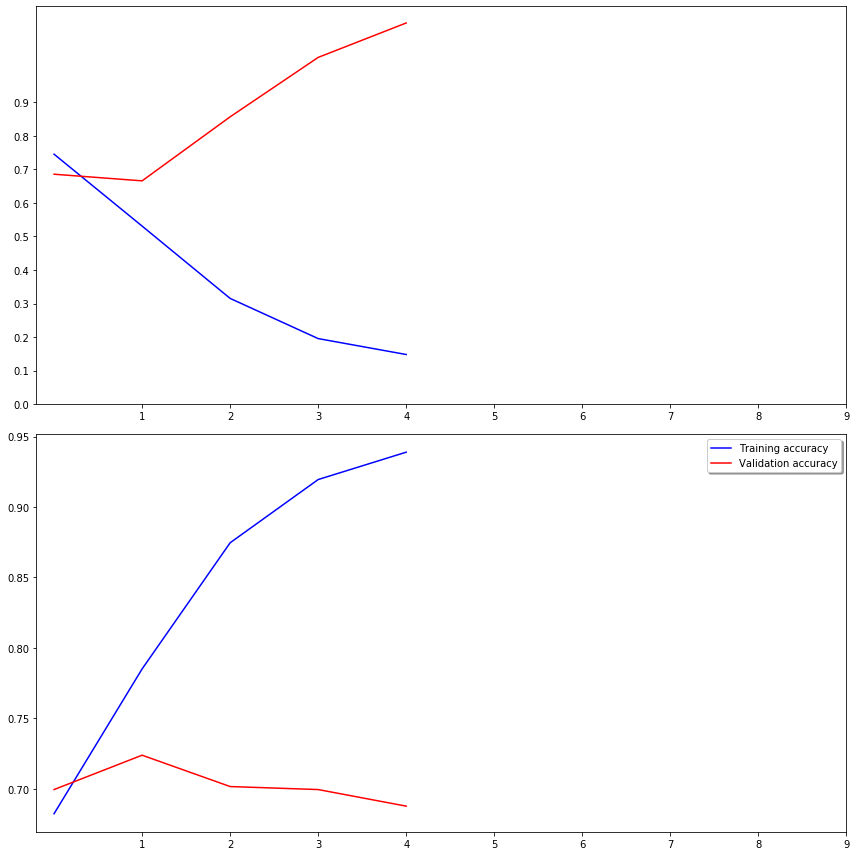

In [76]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 10, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 10, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()
from keras import backend as K 
K.clear_session()

In [77]:
from keras.models import load_model
loaded_LSTMCNN_model = load_model('LSTMCNN_best_weights.02-0.7303.hdf5')
start = time.time()
y_pred = loaded_LSTMCNN_model.predict(x_test_seq)
Y_pred = np.argmax(y_pred, axis=1)
end = time.time()

In [78]:
print(end - start)

3.6637842655181885


In [79]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
results4 = confusion_matrix(testdf['polarity'], Y_pred)
print ('Confusion Matrix :')
print (results4) 
print ('Accuracy Score :') 
print (accuracy_score(testdf['polarity'], Y_pred))
print ('Report : ')
print (classification_report(testdf['polarity'], Y_pred) )

Confusion Matrix :
[[ 690  274   18]
 [ 198 2039  166]
 [  78  368  295]]
Accuracy Score :
0.7329132331555986
Report : 
              precision    recall  f1-score   support

           0       0.71      0.70      0.71       982
           1       0.76      0.85      0.80      2403
           2       0.62      0.40      0.48       741

    accuracy                           0.73      4126
   macro avg       0.70      0.65      0.66      4126
weighted avg       0.72      0.73      0.72      4126



Confusion matrix, without normalization
[[ 690  274   18]
 [ 198 2039  166]
 [  78  368  295]]


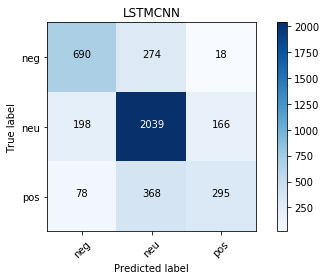

In [80]:
plt.figure()
plot_confusion_matrix(results4, classes=['neg', 'neu', 'pos'], title='LSTMCNN')

This model is the first model then feed into LSTM layer

In [81]:
from keras.layers import Conv1D, GlobalMaxPooling1D, Bidirectional, MaxPooling1D
from keras.layers import LSTM
from keras.layers import Input, Dense, concatenate, Activation, CuDNNLSTM
from keras.models import Model
from keras.layers import Flatten
text_input = Input(shape=(num_features,), dtype='int32')
text_encoder = Embedding(100000, num_features, input_length=num_features, weights=[embedding_matrix],  trainable=True)(text_input)
bigram_branch = Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1)(text_encoder)
bigram_branch = MaxPooling1D(pool_size=2, strides=1)(bigram_branch)
trigram_branch = Conv1D(filters=100, kernel_size=3, padding='valid', activation='relu', strides=1)(text_encoder)
trigram_branch = MaxPooling1D(pool_size=2, strides=1)(trigram_branch)
merged = concatenate([bigram_branch, trigram_branch], axis=1)
merged = Dense(216, activation='relu')(merged)
merged = Dropout(0.5)(merged)
lstm1 = Bidirectional(CuDNNLSTM(num_features))(merged)
lstm1 = Dense(246, activation='relu')(lstm1)
lstm1 = Dropout(0.5)(lstm1)
lstm1 = Dense(3)(lstm1)
output = Activation('softmax')(lstm1)
CNNLSTMmodel = Model(inputs=[text_input], outputs=[output])
CNNLSTMmodel.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
CNNLSTMmodel.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 300)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 300, 300)     30000000    input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 299, 100)     60100       embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 298, 100)     90100       embedding_1[0][0]                
__________________________________________________________________________________________________
max_poolin

In [82]:
from keras.callbacks import ModelCheckpoint
filepath="CNNLSTM_best_weights.{epoch:02d}-{val_acc:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = CNNLSTMmodel.fit(x_train_seq, y_train, validation_data=(x_val_seq, y_validation),
          callbacks = [checkpoint],batch_size=64, epochs=5)

Train on 18702 samples, validate on 4676 samples
Epoch 1/5
18702/18702 [==============================] - 72s 4ms/step - loss: 0.7757 - acc: 0.6692 - val_loss: 0.7383 - val_acc: 0.6925

Epoch 00001: val_acc improved from -inf to 0.69247, saving model to CNNLSTM_best_weights.01-0.6925.hdf5
Epoch 2/5
18702/18702 [==============================] - 69s 4ms/step - loss: 0.5348 - acc: 0.7854 - val_loss: 0.7048 - val_acc: 0.7132

Epoch 00002: val_acc improved from 0.69247 to 0.71322, saving model to CNNLSTM_best_weights.02-0.7132.hdf5
Epoch 3/5
18702/18702 [==============================] - 69s 4ms/step - loss: 0.2670 - acc: 0.8987 - val_loss: 0.8611 - val_acc: 0.6867

Epoch 00003: val_acc did not improve from 0.71322
Epoch 4/5
18702/18702 [==============================] - 69s 4ms/step - loss: 0.1626 - acc: 0.9361 - val_loss: 1.0457 - val_acc: 0.6769

Epoch 00004: val_acc did not improve from 0.71322
Epoch 5/5
18702/18702 [==============================] - 69s 4ms/step - loss: 0.1166 - acc: 

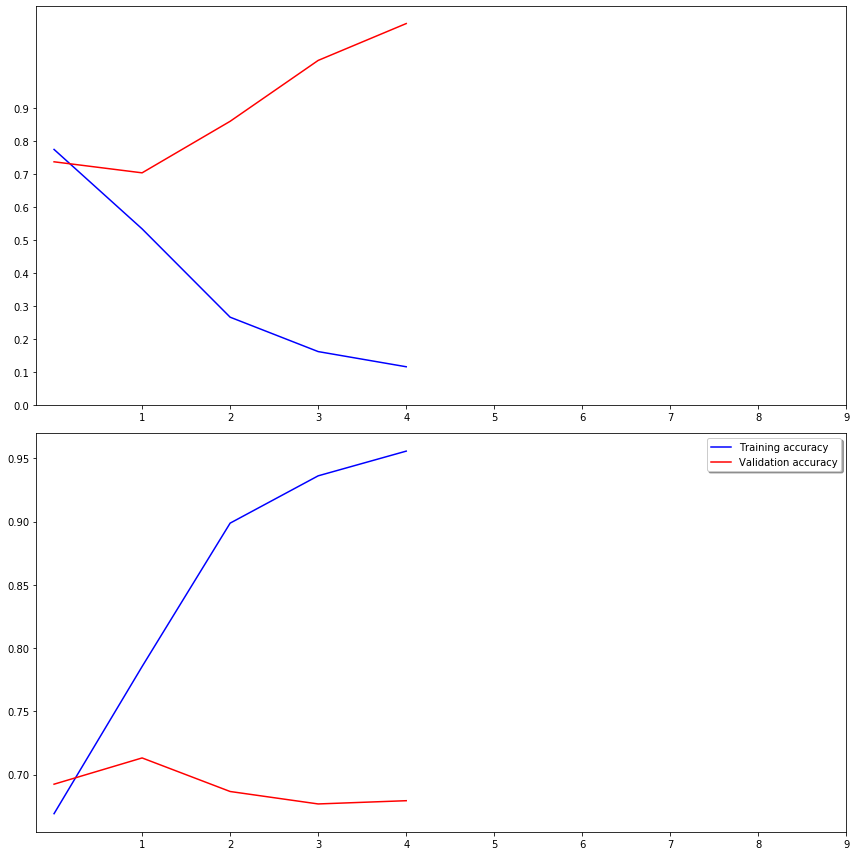

In [83]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 10, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 10, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()
from keras import backend as K 
K.clear_session()

In [91]:
from keras.models import load_model
loaded_CNNLSTM_model = load_model('CNNLSTM_best_weights.01-0.7107.hdf5')
start = time.time()
y_pred = loaded_CNNLSTM_model.predict(x_test_seq)
Y_pred = np.argmax(y_pred, axis=1)
end = time.time()

In [92]:
print(end - start)

5.285344362258911


In [93]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
results6 = confusion_matrix(testdf['polarity'], Y_pred)
print ('Confusion Matrix :')
print (results6) 
print ('Accuracy Score :') 
print (accuracy_score(testdf['polarity'], Y_pred))
print ('Report : ')
print (classification_report(testdf['polarity'], Y_pred) )

Confusion Matrix :
[[ 702  227   53]
 [ 253 1856  294]
 [  79  316  346]]
Accuracy Score :
0.7038293746970431
Report : 
              precision    recall  f1-score   support

           0       0.68      0.71      0.70       982
           1       0.77      0.77      0.77      2403
           2       0.50      0.47      0.48       741

    accuracy                           0.70      4126
   macro avg       0.65      0.65      0.65      4126
weighted avg       0.70      0.70      0.70      4126



Although did not outperform the other model CNNLSTM, CNNLSTM show some potential in distingushing between neutral and positive sentence.

Confusion matrix, without normalization
[[ 702  227   53]
 [ 253 1856  294]
 [  79  316  346]]


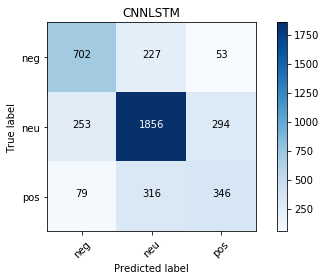

In [94]:
plt.figure()
plot_confusion_matrix(results6, classes=['neg', 'neu', 'pos'], title='CNNLSTM')

Conclusion:
    While deep learning clearly outperform traditional machine learning, the performance of XGBoost should not be overlook. Although with relativly small dataset, deep learning perform well and with bigger dataset deep learning should perform better.